In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd    

In [3]:
data = pd.read_csv("insurance.csv")      # accessing the data

In [4]:
data.head()                             # to see what our data contains and read it

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape                            # to see the row and column count of the data, which returns a tuple (rows,columns)

(1338, 7)

In [6]:
print("the row count of the data set is {}".format(data.shape[0]))  # to express the number of rows in a better manner 

the row count of the data set is 1338


In [7]:
data.info()                   # gives more information regarding data types,memory usage,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isna().sum()             # to check for null values,  (we find there are none)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()                 # creates summary for numerical data type columns 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.duplicated().sum()              # to check for duplicated values in the data, we use sum to find the number of such values

1

In [11]:
data.drop_duplicates(inplace=True)   #  if you set inplace = True , drop_duplicates will drop all duplicate values from your original dataset

In [12]:
data.duplicated().sum()             # to recheck whether the dupli have been dropped

0

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns                # to make data visual we import matplotlib and seaborn
sns.set_palette(sns.color_palette("pastel"))

In [14]:
data.value_counts("sex")             # to get the values of males and females (works for binary type/ categorical data)

sex
male      675
female    662
Name: count, dtype: int64

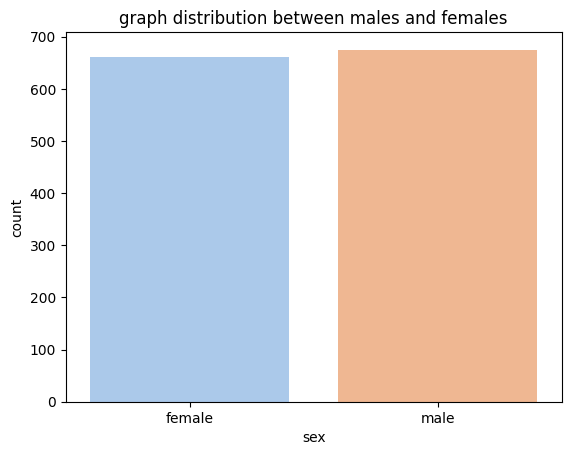

In [15]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(x = "sex", data = data)   # shows a categorical histogram and not a quantitative variable
plt.title("graph distribution between males and females")
plt.show()                              # to visually present the value counts      

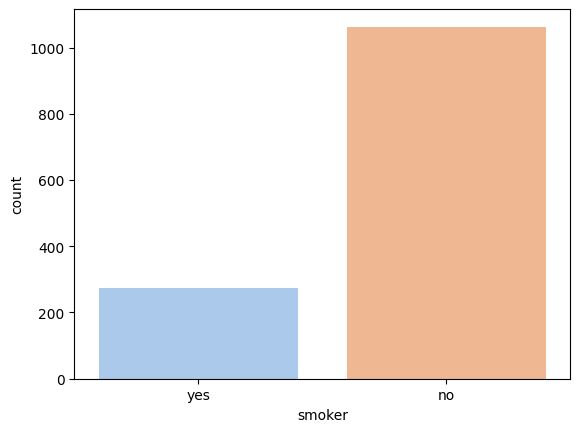

In [16]:
sns.countplot(x = "smoker",data = data)
plt.show()        

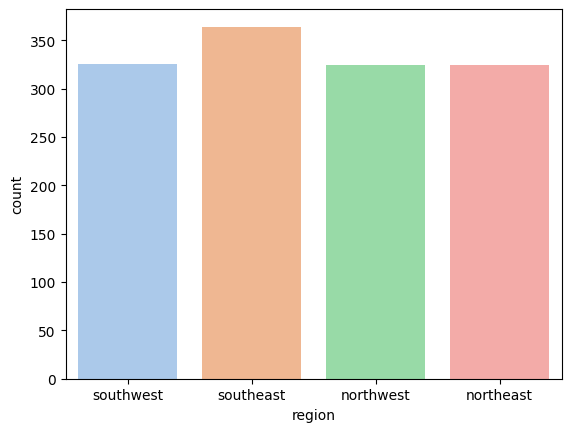

In [17]:
sns.countplot(x = "region", data = data)
plt.show()

In [18]:
from sklearn import preprocessing

In [19]:
labelencoder = preprocessing.LabelEncoder()         # to encode non-numeric data to numeric / to convert categorical var to numeric

In [20]:
data.head()                                         # to see the original version of data to compare it later after encoding

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
data["smoker"] = labelencoder.fit_transform(data["smoker"])    # fit_transform is used to determine the parameters and transform the dataset
data["sex"] = labelencoder.fit_transform(data["sex"])
data["region"] = labelencoder.fit_transform(data["region"])

# this code converts all categorical columns with non- numeric value to numeric value


In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
data.corr()["charges"].sort_values(ascending = False)         # now we check the correlation coefficient of the different columns wrt charges

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

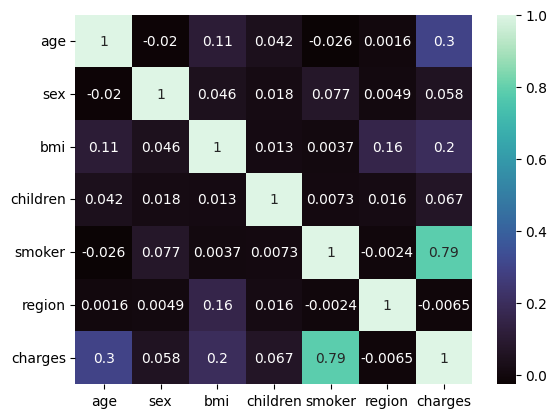

In [24]:
sns.heatmap(data.corr(),annot = True, cmap = "mako")      
# in a heatmap, each row and column represent a variable and the cells shows the correlation between them
# annot - annotate the heatmap/show the corr in numeric terms , cmap - maps the data values to the colour space    

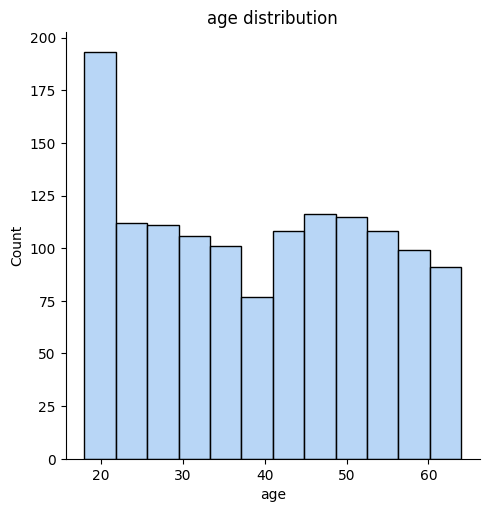

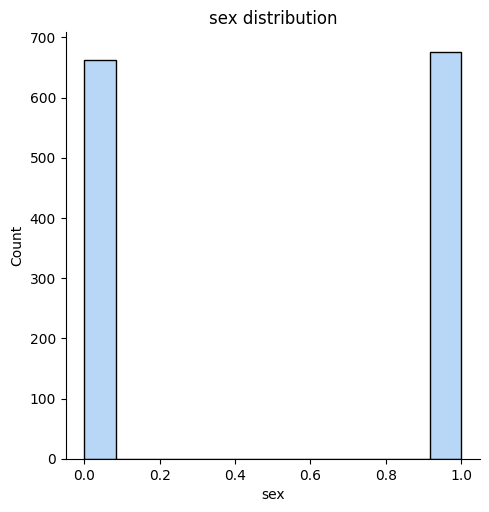

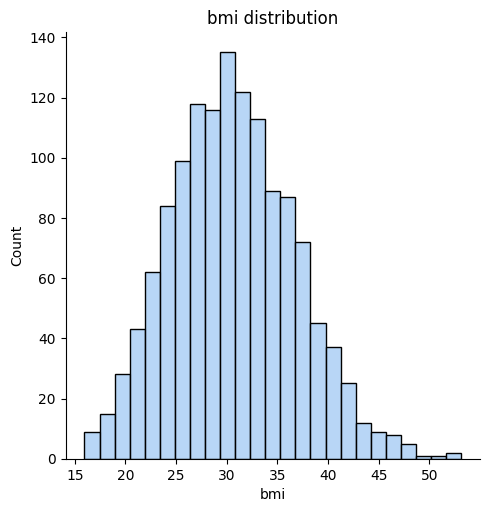

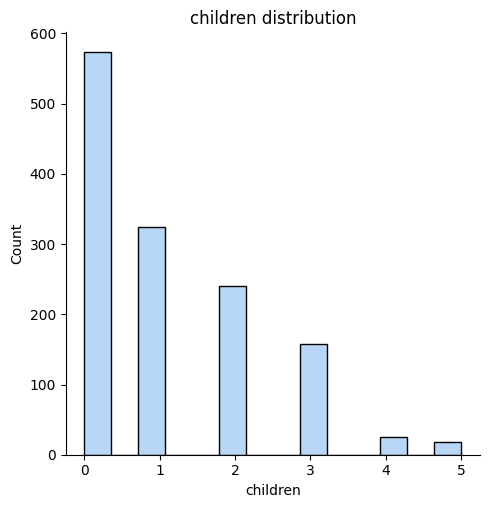

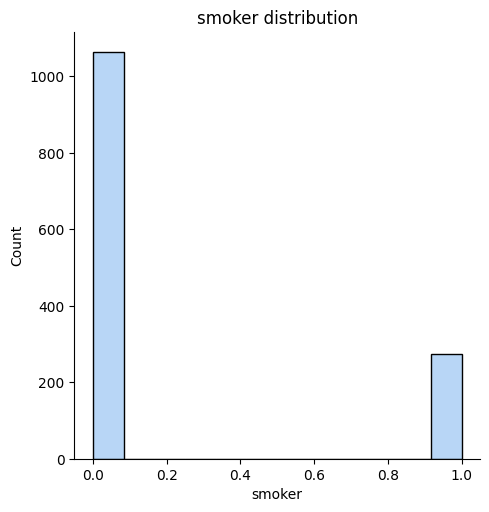

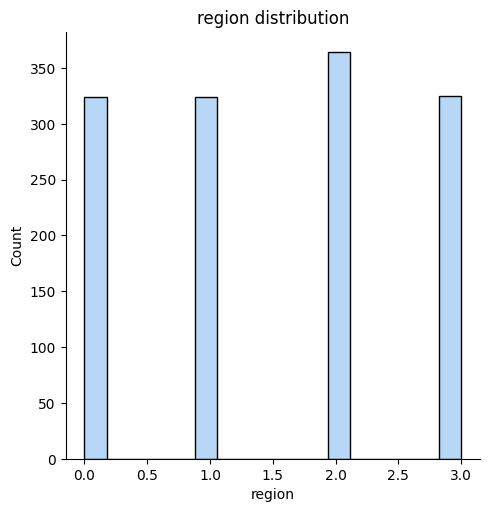

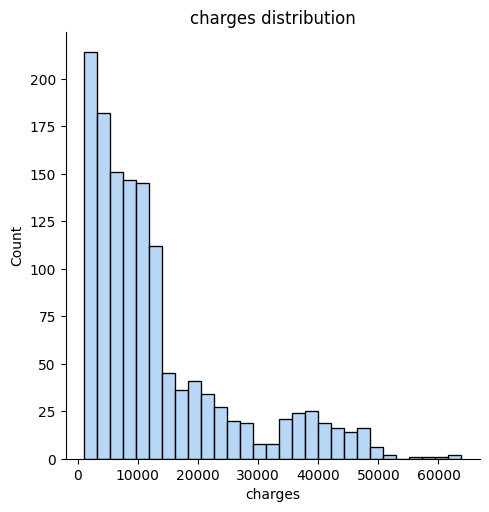

In [25]:
for i in data.columns:                   # iterating over the colums in the data to show each of their distribution
    sns.displot(data[i])                 # to create distributions 
    plt.title(i + ' ' + "distribution")  # to title the distributions created earlier with the column name followed by 'distribution'
    plt.show()                           # to display the titled distributions    
       

In [26]:
colorsforx = [ "red","blue","green","yellow","black","pink"]      # defining a list to iterate over for changing colors of x
colorchanger = 0


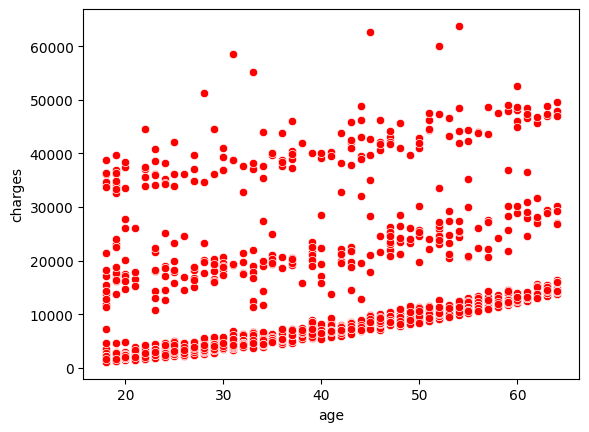

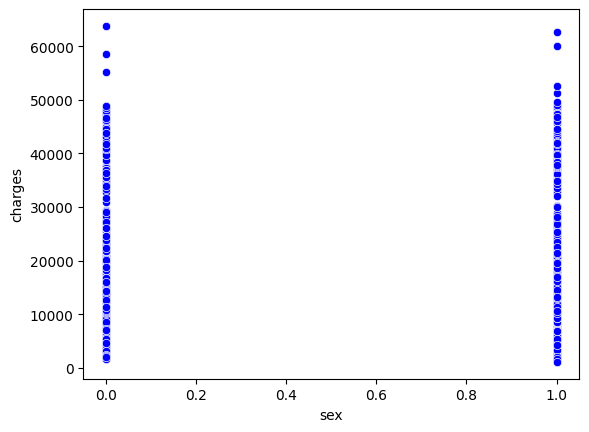

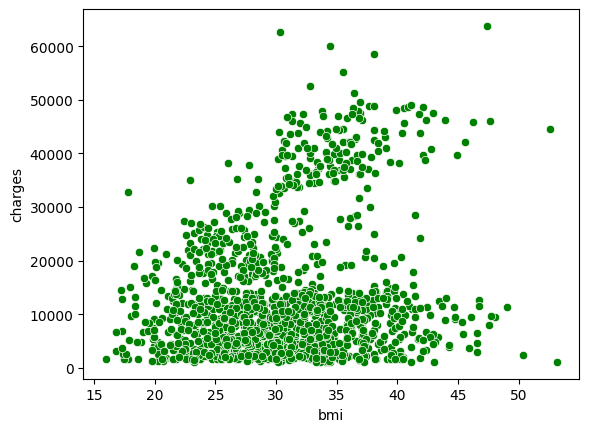

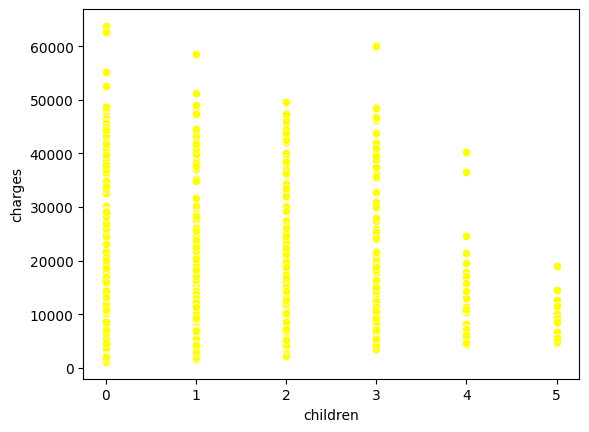

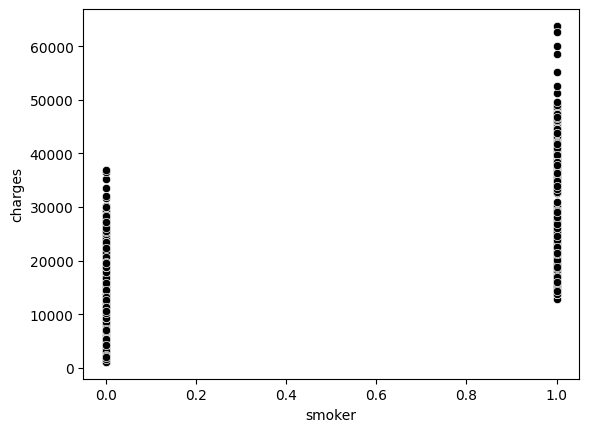

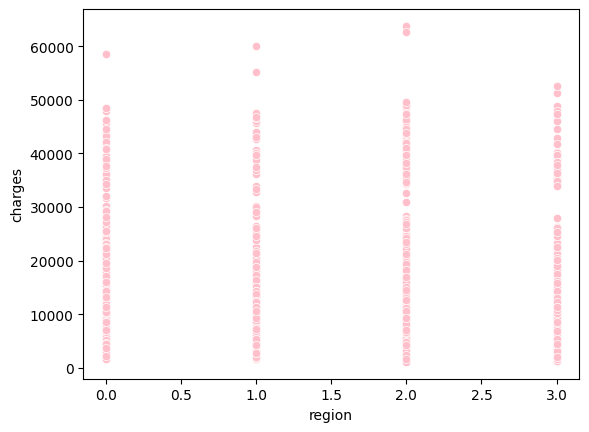

In [27]:
for i in data.columns[:-1]:                  # -1 for not taking the charts columns
    sns.scatterplot(data = data, x = i, y = "charges", color = colorsforx[colorchanger])
    plt.show()
    colorchanger += 1 